Front windshield camera -- angled 22 degrees down from pointing straight up

this makes the projection math slightly more complicated.

x, y, z = R * \[x y 1\]

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
camera_matrix = np.load("../../tools/camcal/camera_matrix.npy")
dist_coeffs = np.load("../../tools/camcal/dist_coeffs.npy")
caljpg = plt.imread("../../tools/camcal/cal1.jpg")


(-0.5, 2591.5, 2240.87636266723, -443.37575546994924)

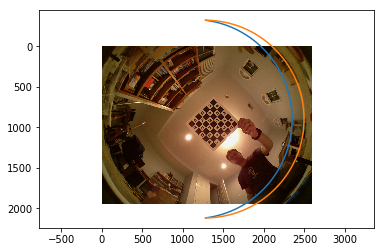

In [45]:
camang = 22*np.pi/360.

def campts(h, camang):
    R = cv2.Rodrigues(np.float32([0, camang, 0]))[0]
    scale = h / 1944.0
    fx, fy = np.diag(camera_matrix)[:2] * scale
    cx, cy = camera_matrix[:2, 2] * scale
    k1 = dist_coeffs[0]

    npix = int(2 * np.pi * fx * np.pi/2 + 0.5)
    phi = np.linspace(-np.pi/2, np.pi/2, npix)
    xyz = np.dot(R, np.vstack([np.cos(phi), np.sin(phi), np.zeros(len(phi))]))

    ab = xyz[:2] / xyz[2]
    r = np.sqrt(np.sum(ab**2, axis=0))
    theta = np.arctan(r)
    theta = theta*(1 + k1*theta**2)
    uv = theta*ab/r
    return (uv.T * np.array([fx, fy]) + np.array([cx, cy])).T

uv = campts(1944, -camang)
plt.imshow(caljpg)
plt.plot(*uv)
uv = campts(1944, -0.01)
plt.plot(*uv)

plt.axis('equal')